# Перевод к нижнему регистру

In [22]:
import os
f = open('sentences.txt','r+')
t = open("filename.txt", "w+")

f = list (f)

for line in f:
     t.write(line.lower())
t.close()

os.remove("sentences.txt")
os.rename('filename.txt', 'sentences.txt')

        

## Разбиение текстов на слова

In [23]:
import re
with open("sentences.txt", "r+") as t:
    t = list (t)
    dictionary = {}
    for line in t:
        result = filter (None,re.split('[^a-z]', line))                               #удалили пустые символы(filter) и разделили слова (split)
        dictionary.update ({word: index for index, word in enumerate(result)})        # записываем слова в словарь, ключ - слово, значение - число
dictionary1 = {}                                                                  # создам новый словарь, чтобы положить туда исправленный dictionary
dictionary1.update ({word: index for index, word in enumerate(dictionary.keys())})#делаем уникальные значения ключа
dictionary1 = dict(zip(dictionary1.values(), dictionary1.keys()))                 # меняем местами число и ключ
dictionary1




{0: 'displays',
 1: 'osx',
 2: 'selection',
 3: 'safari',
 4: 'just',
 5: 'developed',
 6: 'over',
 7: 'vermin',
 8: 'domestic',
 9: 'named',
 10: 'installed',
 11: 'symbols',
 12: 'through',
 13: 'human',
 14: 'during',
 15: 'disk',
 16: 'its',
 17: 'fifth',
 18: 'features',
 19: 'tamed',
 20: 'upgrade',
 21: 'lb',
 22: 'computers',
 23: 'drive',
 24: 'to',
 25: 'comparison',
 26: 'deliberately',
 27: 'marks',
 28: 'has',
 29: 'predecessor',
 30: 'non',
 31: 'which',
 32: 'read',
 33: 'october',
 34: 'every',
 35: 'os',
 36: 'they',
 37: 'not',
 38: 'using',
 39: 'now',
 40: 'possess',
 41: 'intel',
 42: 'keyboards',
 43: 'bytes',
 44: 'unnecessary',
 45: 'patch',
 46: 'predators',
 47: 'small',
 48: 'output',
 49: 'entirely',
 50: 'where',
 51: 'catenates',
 52: 'available',
 53: 'right',
 54: 'often',
 55: 'people',
 56: 'some',
 57: 'lion',
 58: 'frequency',
 59: 'are',
 60: 'year',
 61: 'download',
 62: 'terms',
 63: 'firmware',
 64: 'concern',
 65: 'flow',
 66: 'error',
 67: 'won

### создание матрицы

In [24]:
#Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице
#должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
import numpy as np
import re
i = 0
j = 0
c = np.ones((22, 254))                              #создали матрицу
while i < len(f):                                    
    j = 0                                             
    temp = filter (None,re.split('[^a-z]', t[i]))   #элемент с индексом (i, j) в этой матрице 
    while j < 254:                                  #равен количеству вхождений j-го слова в i-е предложение
        k = temp.count(dictionary1.get(j)) 
        c[i,j] = k
        j+=1
    i+=1



## Считаем косинусное расстояние 

In [26]:
import scipy
from scipy import spatial
array = []
dictionary2 = {}
i = 1
while i < len(f) :
    array.append(scipy.spatial.distance.cosine(c[0], c[i])) # записали расстояния от 0 
    i +=1
dictionary2.update ({word: index for index, word in enumerate(array)}) #до всех предложений в массив, создали словарь расстояние - номер строки
min1 = min(dictionary2.keys())                                          # достали минимальный ключ и значения по элементам
number1 = dictionary2.get(min1)
number1
#del dictionary2[min1]
#min2 = min(dictionary2.keys())
#number2 = dictionary2.get(min2)
#number2

5

## Записываем ответ

In [16]:
with open("answers1.txt", "w+") as a:
    answer = [number1,number2]
    for item in answer:
        a.write("%s %s" % item % item)
!cat answers1.txt

TypeError: not enough arguments for format string

# Часть 2. Апроксимация функции

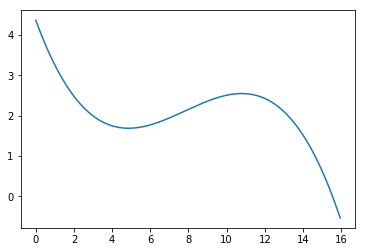

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [6]:
import scipy
import numpy as np
import pandas as pd
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
def g(x):
    return np.sin(x / 5.)* np.exp(x / 10.) + 5 * np.exp(-x /2.)
matrix = np.array([[1, 1, 1, 1],[1, 4, 16, 64],[1, 10, 100, 1000], [1, 15, 225, 3375]])
s1 = g(1)
s2 = g(4)
s3 = g(10)
s4 = g(15)
value = np.array([s1,s2,s3,s4])
elements = linalg.solve(matrix,value)
def f(x):
    i = 0
    y = 0
    while i<4:
        y = elements[i]*(x**i) + y
        i+=1
    return y
x = np.arange(0., 16., 0.05)
plt.plot(x, f(x))
plt.show()
elements   

## записываем ответ

In [10]:
with open("answers2.txt", "w+") as a:
    answer2 = elements
    for item in answer2:
        a.write(" %s" % item)
!cat answers2.txt

 4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332

## шпора от Антохи, как объявлять функцию

In [ ]:
def t(x):
    return x**2
t = lambda x: x**2

In [20]:
>>> l=range(5)
>>> print l
[0, 1, 2, 3, 4]
>>> ''.space(str(i) for i in l)
'01234'

[0, 1, 2, 3, 4]


AttributeError: 'str' object has no attribute 'space'